### 1

In [45]:
import numpy as np
import scipy
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

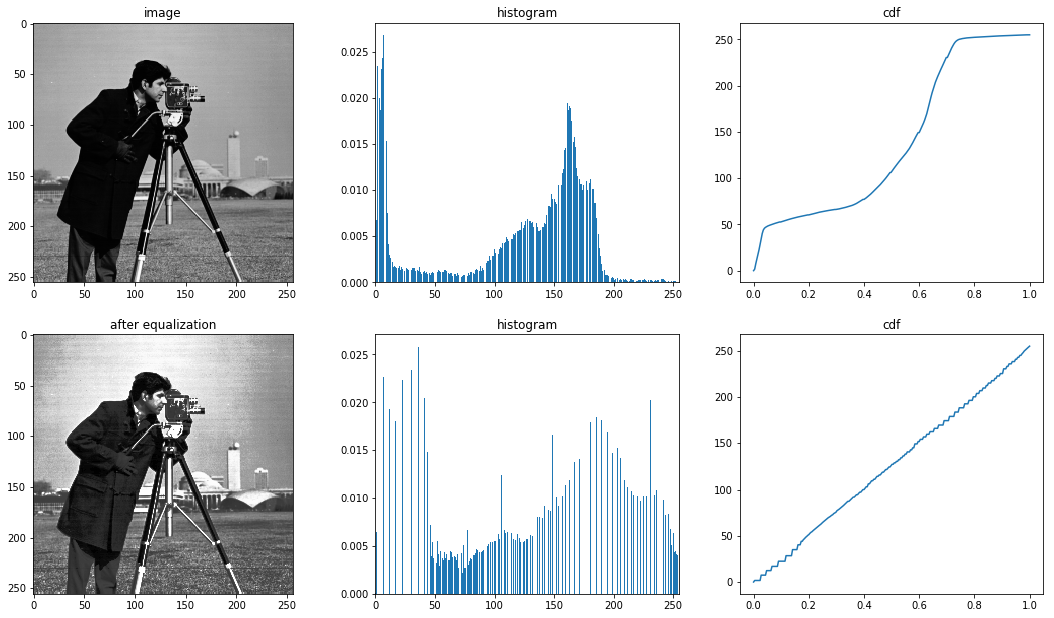

In [59]:
im = np.array(Image.open('../data/cameraman.tiff').convert('L'))

f, ax = plt.subplots(2, 3)
plt.gray()
f.set_size_inches(18.5, 10.5)


ax[0, 0].imshow(im)
ax[0, 0].set_title('image')

# image histogram
imhist, bins = np.histogram(im.flatten(), 256, normed=True)
ax[0, 1].bar(range(256), imhist)
ax[0, 1].set_xlim([0, 255])
ax[0, 1].set_title('histogram')

# cumulative distribution function
cdf = imhist.cumsum()
cdf = 255 * cdf / cdf[-1] # normilize
ax[0, 2].plot(np.linspace(0, 1, 256), cdf)
ax[0, 2].set_title('cdf')

# linear interpolation of cdf to find new pixel values
im2 = np.interp(im.flatten(), bins[:-1], cdf)
ax[1, 0].imshow(im2.reshape(im.shape))
ax[1, 0].set_title('after equalization')

# image histogram
imhist, bins = np.histogram(im2.flatten(), 256, normed=True)
ax[1, 1].bar(range(256), imhist)
ax[1, 1].set_xlim([0, 255])
ax[1, 1].set_title('histogram')

# cumulative distribution function
cdf = imhist.cumsum()
cdf = 255 * cdf / cdf[-1] # normilize
ax[1, 2].plot(np.linspace(0, 1, 256), cdf)
ax[1, 2].set_title('cdf')

plt.show()

In [11]:
def image_histogram_equalization(image, number_bins=256):
    image_histogram, bins = np.histogram(image.flatten(), number_bins, normed=True) # get image histogram
    cdf = image_histogram.cumsum()
    cdf = 255 * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf)

    return image_equalized.reshape(image.shape), cdf

### 2

In [18]:
#1
# in Cy - the values outside the diagonal are 0. and the values within the diagonal are its own values.
# but they're the values of Cx, poduced by a product in matrix A.

In [19]:
#2
#3.6
# All that histogram equalization does is remap histogram components on the in- tensity scale.
# To obtain a uniform (flat) histogram would require in general that pixel intensities actually be
# redistributed so that there are L groups of n /L pixels with the same intensity,
# where L is the number of allowed discrete intensity lev- els and n = M N is the total number of pixels
# in the input image.
# The histogram equalization method has no provisions for this type
# of (artificial) intensity redis- tribution process.

In [20]:
#3.16
# a. The key to solving this problem is to recognize (1) that the convolution re- sult at any location (x , y)
# consists of centering the mask at that point and then forming the sum of the products of the mask coefficients
# with the corresponding pixels in the image;
# and (2) that convolution of the mask with the entire image results in every pixel in the image being
# visited only once by every element of the mask
# (i.e., every pixel is multiplied once by every coefficient of the mask).
# Because the coefficients of the mask sum to zero, this means that the sum of the products of the coefficients
# with the same pixel also sum to zero.
# Carrying out this argument for every pixel in the image leads to the conclusion that the sum of the elements
# of the convolution array also sum to zero.

# b. The only difference between convolution and correlation is that the mask is rotated by 180◦.
# This does not affect the conclusions reached in (a), so cor- relating an image with a mask whose coefficients
# sum to zero will produce a correlation image whose elements also sum to zero.

In [21]:
#3
#3.23
# The student should realize that both the Laplacian and the averaging process are linear operations,
# so it makes no difference which one is applied first.

In [22]:
#3.24 - in PDF

### 3